<a href="https://colab.research.google.com/github/xiangli-chen/tensorflow2.x_notes/blob/master/basic_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic classification: Classify images of clothing


In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

%tensorflow_version 2.x
%load_ext tensorboard
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2.1.0


## Import_the_fashion_mnist_dataset
60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

In [14]:
print(f'train images shape is {train_images.shape}.')
print(f'there are {len(train_labels)} train labels.')
print(f'train labels are {train_labels}.')
print(f'test images shape is {test_images.shape}.')
print(f'there are {len(test_labels)} test labels.')
print(f'test labels are {test_labels}.')

train images shape is (60000, 28, 28).
there are 60000 train labels.
train labels are [9 0 0 ... 3 0 5].
test images shape is (10000, 28, 28).
there are 10000 test labels.
test labels are [9 2 1 ... 8 1 5].


### Preprocess data

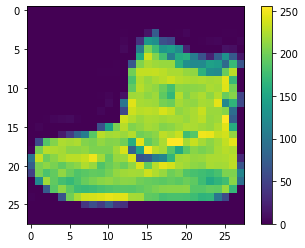

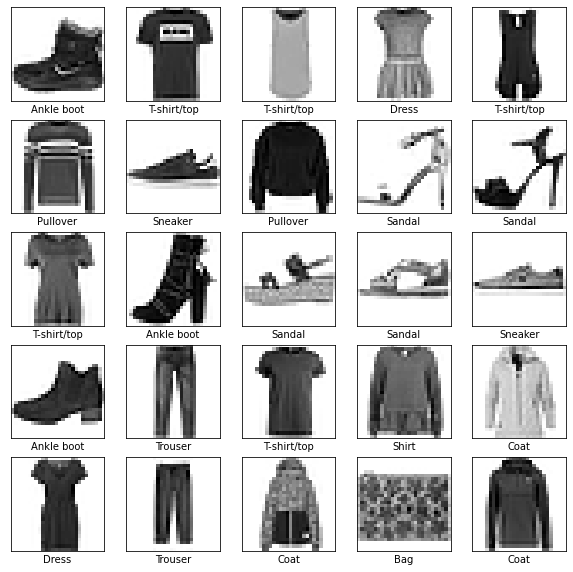

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Scale to a range of 0 to 1 
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model
### Build model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### Compile the model
- Loss function — This measures how accurate the model is during training. 
- Optimizer — This is how the model is updated based on the data it sees and its loss function.
- Metrics — Used to monitor the training and testing steps.

In [0]:
# from_logits: Whether y_pred is expected to be a logits tensor. 
# By default, we assume that y_pred encodes a probability distribution that from_logits=False. 
# Note: Using from_logits=True may be more numerically stable.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

1. Feed the training data to the model. 
2. The model learns to associate images and labels.
3. Make predictions about a test set—in this example, the test_images array.
4. Verify that the predictions match the labels from the test_labels array.

In [23]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4966 - accuracy: 0.8244
Epoch 2/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3762 - accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3369 - accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3131 - accuracy: 0.8854
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2940 - accuracy: 0.8914
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2783 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2674 - accuracy: 0.9011
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2559 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2465 - accuracy: 0.9080
Epoch 10/10
60

## Evaluate accuracy

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

10000/10000 - 0s - loss: 0.3556 - accuracy: 0.8754
Test accuracy: 0.8754000067710876


### Maker predictions

In [26]:
# Convert the logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(f'prediction distribution: {predictions[0]}')
print(f'label has the highest probability: {np.argmax(predictions[0])}')

prediction distribution: [1.8187868e-10 4.9378092e-11 7.0939997e-11 3.3531582e-09 1.8678217e-11
 1.8367241e-03 7.5708234e-10 2.1090087e-02 5.1639093e-09 9.7707319e-01]
label has the highest probability: 9


#### Visualize predictions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                class_names[true_label]),color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

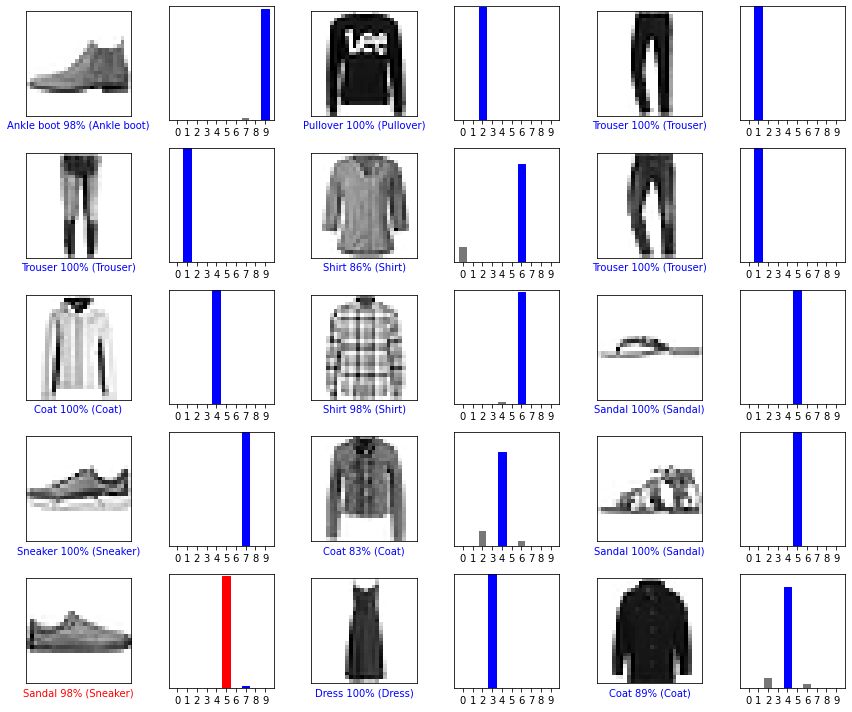

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

img shape is: (28, 28)
img shape is: (1, 28, 28)
prediction distribution: [1.49198982e-04 1.08355684e-16 9.95489419e-01 1.43284016e-08
 3.46781773e-04 2.97194871e-15 4.01461031e-03 8.41855657e-17
 8.37818759e-10 3.63522824e-15]


2

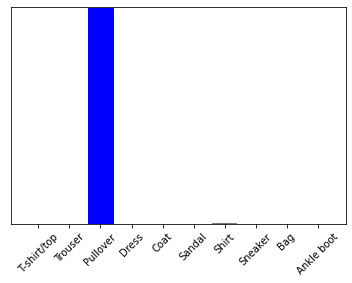

In [29]:
# Grab an image from the test dataset.
img = test_images[1]
print(f'img shape is: {img.shape}')

# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(f'img shape is: {img.shape}')

predictions_single = probability_model.predict(img)
print(f'prediction distribution: {predictions_single[0]}')

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])